In [1]:
#import required libraries.
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#convert categorical variables into dummy/indicator variables.
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [4]:
# Create X features and y labels
X = insurance_one_hot.drop("charges", axis=1)
y = insurance["charges"]

In [5]:
#View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [6]:
#View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [7]:
# Create training and test sets using sckit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [8]:
# Build a neural netwrok
tf.random.set_seed(42)

#1. Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
             optimizer= tf.keras.optimizers.Adam(lr=0.01),
             metrics= (["mae"]))
#3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

34/34 [==============================] - 0s 1ms/step - loss: 11434.4707 - mae: 11434.4707
Epoch 2/100
34/34 [==============================] - 0s 912us/step - loss: 7504.8159 - mae: 7504.8159
Epoch 3/100
34/34 [==============================] - 0s 788us/step - loss: 7289.5010 - mae: 7289.5010
Epoch 4/100
34/34 [==============================] - 0s 930us/step - loss: 7064.4624 - mae: 7064.4624
Epoch 5/100
34/34 [==============================] - 0s 824us/step - loss: 6825.5918 - mae: 6825.591

34/34 [==============================] - 0s 781us/step - loss: 3516.9299 - mae: 3516.9299
Epoch 74/100
34/34 [==============================] - 0s 811us/step - loss: 3534.0625 - mae: 3534.0625
Epoch 75/100
34/34 [==============================] - 0s 781us/step - loss: 3531.4092 - mae: 3531.4092
Epoch 76/100
34/34 [==============================] - 0s 781us/step - loss: 3529.5178 - mae: 3529.5178
Epoch 77/100
34/34 [==============================] - 0s 779us/step - loss: 3581.6047 - mae: 3581.6047
Epoch 78/100
34/34 [==============================] - ETA: 0s - loss: 3192.7329 - mae: 3192.732 - 0s 810us/step - loss: 3626.9426 - mae: 3626.9426
Epoch 79/100
34/34 [==============================] - 0s 785us/step - loss: 3536.0525 - mae: 3536.0525
Epoch 80/100
34/34 [==============================] - 0s 747us/step - loss: 3501.3208 - mae: 3501.3208
Epoch 81/100
34/34 [==============================] - 0s 805us/step - loss: 3546.2805 - mae: 3546.2805
Epoch 82/100
34/34 [======================

In [9]:
#check the results of the insurance model on the test data
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3167.3213 - mae: 3167.3213


[3167.3212890625, 3167.3212890625]

In [10]:
# Let's normalize data using scikit-learn and run it through neuro network and see if the model performs better.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

#create a column transformer
ct = make_column_transformer(
        (MinMaxScaler(),["age", "bmi", "children"]),
        (OneHotEncoder(handle_unknown= "ignore"),["sex","smoker","region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization(MinMaxScalar and OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [11]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [12]:
X_test_normal[0]

array([0.58695652, 0.24791499, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [13]:
# Let's now recreate the neural network

# set random seed.
tf.random.set_seed(42)

#1. Build the model.
model_n = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_n.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(lr=0.01),
               metrics = (["mae"]))

#3. Fit the model
history = model_n.fit(X_train_normal, y_train, epochs = 100, verbose=0)

Text(0.5, 0, 'iterations')

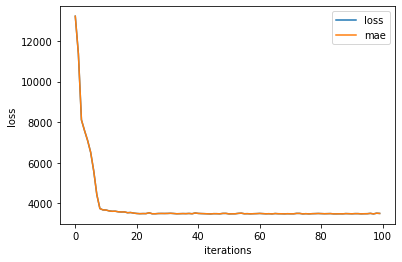

In [14]:
# plot iterations vs loss
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("iterations")

In [15]:
# Evaluate the model with testing data
model_n.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 776us/step - loss: 3176.3691 - mae: 3176.3691


[3176.369140625, 3176.369140625]

Normalization did not actually improve for the same conditions. Normalization or without normalization model would give similar predictions in this case!